In [615]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Libraries**

In [616]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## **Features Explaination**

* `work_year` : The year the salary was paid.
* `experience_level` : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
* `employment_type` : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
* `job_title` : The role worked in during the year.
* `salary` : The total gross salary amount paid.
* `salary_currency` : The currency of the salary paid as an ISO 4217 currency code.
* `salary_in_usd` : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* `employee_residence` : Employee's primary country of residence in during the work year as an ISO 3166 country code.
* `remote_ratio` : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
* `company_location` : The country of the employer's main office or contracting branch as an ISO 3166 country code.
* `company_size` : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

## **Load data**

In [617]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing/Portfolio/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


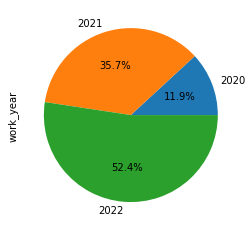

In [618]:
df.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

In [619]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Observation:
1.  Column `Unnamed: 0` needs to be removed, as it is unecessary columns.
2.  The names of each column are lowercase.
3.  The values of the `experience_level`, `employment_type`, `remote_ratio`, and `company_size` columns need to be redefined.
4.  `work_year`, `salary`, `salary_in_usd`, and `remote_ratio` columns are numeric.
5.  More than 50% of data are in 2022.

## **Data Cleansing**

### Drop unecessary columns

In [620]:
# Drop unecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [621]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


### Handling missing values

In [622]:
# Checking and handling missing values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Handling duplicated data

In [623]:
# Checking duplicated data
df.duplicated().sum()

42

There are 42 duplicate rows; will be dropped later.

In [624]:
df[df.duplicated(keep=False)].sort_values('job_title').head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M
528,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M


In [625]:
# Drop duplicated rows
df = df.drop_duplicates()

In [626]:
# Sanity check
df.duplicated().sum()

0

In [627]:
# Reset Index
df = df.reset_index(drop=True)

Done. Duplicated rows have gone.

### Renaming the column value

In [628]:
# Renaming the column value

# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)

# Employment Type
df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)

# Remote Ratio
df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

# Company Size
df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,Onsite,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,Onsite,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,Onsite,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [629]:
# Recheck data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    object
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(3), object(8)
memory usage: 48.7+ KB


### Checking the number of unique values

In [630]:
# Checking the number of unique values in each column

dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3
company_location,50


In [631]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [632]:
df.describe()

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


### **Additional Check**

In [633]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [634]:
# check for odd values in categorical columns, such as string "-", or other
for i in df[categorical].columns:
    x = df[categorical][i].value_counts()
    print(i)
    print(x,'\n')

employment_type
Full-time    546
Part-time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64 

salary_currency
USD    359
EUR     93
GBP     43
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64 

company_size
Medium    290
Large     193
Small      82
Name: company_size, dtype: int64 

experience_level
Senior-level    243
Mid-level       208
Entry-level      88
Expert-level     26
Name: experience_level, dtype: int64 

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning 

Observations:
1. Successfully drop unnecessary column : `Unnamed: 0`.
2. Dataframe has no missing values.  
3. There are **42** duplicate rows, but have gone.
4. Renaming the values in columns `experience_level`, `employment_type`, `remote_ratio`, `company_size` to make it easier to understand the data.
5. After renaming the column value, the dtype of the `remote_ratio` column changes to object.



## **Exploratory Data Analysis**

### Statistical Summary of Columns

In [635]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [636]:
df[numerical]

,work_year,salary,salary_in_usd
0,2020,70000,79833
1,2020,260000,260000
2,2020,85000,109024
3,2020,20000,20000
4,2020,150000,150000
...,...,...,...
560,2022,154000,154000
561,2022,126000,126000
562,2022,129000,129000
563,2022,150000,150000


In [637]:
df[numerical].describe()

,work_year,salary,salary_in_usd
count,565.000000,5.650000e+02,565.000000
mean,2021.364602,3.381160e+05,110610.343363
std,0.698138,1.599879e+06,72280.702792
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,6.700000e+04,60757.000000
50%,2021.000000,1.109250e+05,100000.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [638]:
df[categorical]

,employment_type,salary_currency,company_size,experience_level,job_title,remote_ratio,employee_residence,company_location
0,Full-time,EUR,Large,Mid-level,Data Scientist,Onsite,DE,DE
1,Full-time,USD,Small,Senior-level,Machine Learning Scientist,Onsite,JP,JP
2,Full-time,GBP,Medium,Senior-level,Big Data Engineer,Hybrid,GB,GB
3,Full-time,USD,Small,Mid-level,Product Data Analyst,Onsite,HN,HN
4,Full-time,USD,Large,Senior-level,Machine Learning Engineer,Hybrid,US,US
...,...,...,...,...,...,...,...,...
560,Full-time,USD,Medium,Senior-level,Data Engineer,Remote,US,US
561,Full-time,USD,Medium,Senior-level,Data Engineer,Remote,US,US
562,Full-time,USD,Medium,Senior-level,Data Analyst,Onsite,US,US
563,Full-time,USD,Medium,Senior-level,Data Analyst,Remote,US,US


In [639]:
df[categorical].describe()

,employment_type,salary_currency,company_size,experience_level,job_title,remote_ratio,employee_residence,company_location
count,565,565,565,565,565,565,565,565
unique,4,17,3,4,50,3,57,50
top,Full-time,USD,Medium,Senior-level,Data Scientist,Remote,US,US
freq,546,359,290,243,130,346,295,318


Observations:

*  a
*  b
*  c

### Univariate Analysis

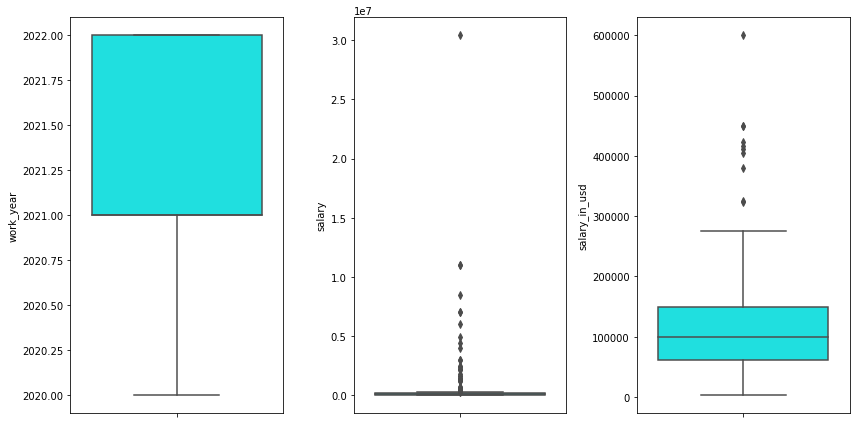

In [640]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

Observation:
1.   There is no outlier in `work_year` column.
2.   There are some outliers in the `salary` and `salary_in_usd` columns.



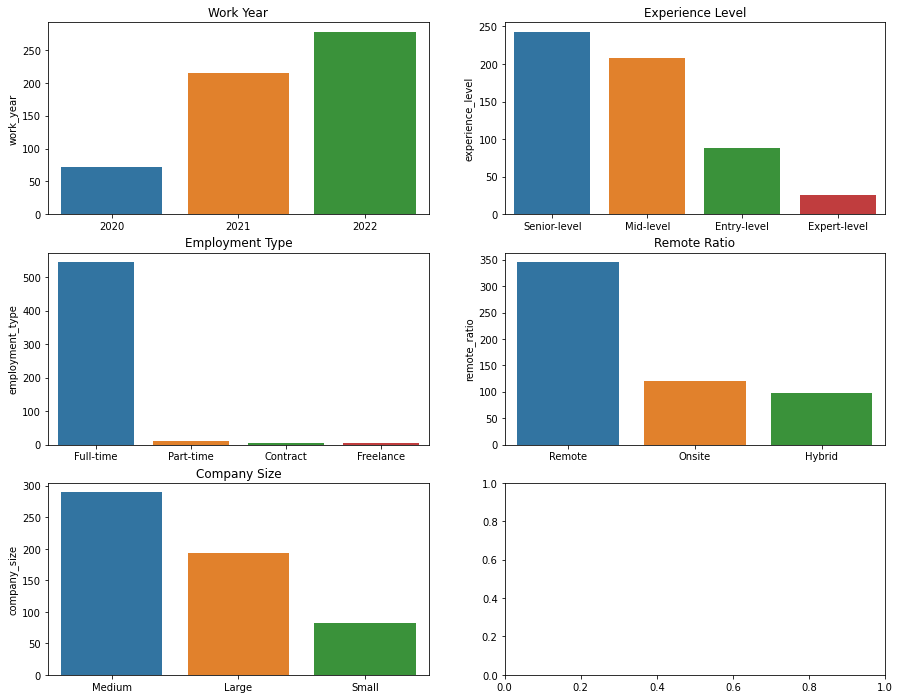

In [641]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))

sns.barplot(x = df["work_year"].value_counts().sort_values(ascending = False).index, y = df["work_year"].value_counts().sort_values(ascending = False), ax = axes[0][0])
axes[0][0].set_title("Work Year")

sns.barplot(x = df["experience_level"].value_counts().sort_values(ascending = False).index, y = df["experience_level"].value_counts().sort_values(ascending = False), ax = axes[0][1])
axes[0][1].set_title("Experience Level")

sns.barplot(x = df["employment_type"].value_counts().sort_values(ascending = False).index, y = df["employment_type"].value_counts().sort_values(ascending = False), ax = axes[1][0])
axes[1][0].set_title("Employment Type")

sns.barplot(x = df["remote_ratio"].value_counts().sort_values(ascending = False).index, y = df["remote_ratio"].value_counts().sort_values(ascending = False), ax = axes[1][1])
axes[1][1].set_title("Remote Ratio")

sns.barplot(x = df["company_size"].value_counts().sort_values(ascending = False).index, y = df["company_size"].value_counts().sort_values(ascending = False), ax = axes[2][0])
axes[2][0].set_title("Company Size");

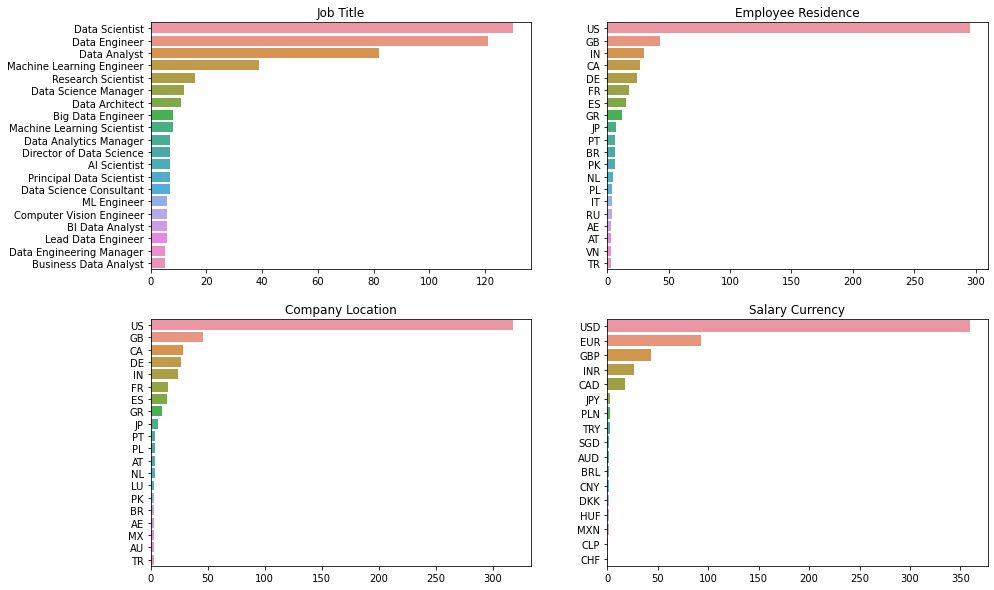

In [642]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.barplot(x = df["job_title"].value_counts().sort_values(ascending = False).head(20), 
            y = df["job_title"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

sns.barplot(x = df["employee_residence"].value_counts().sort_values(ascending = False).head(20), 
            y = df["employee_residence"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][1])
axes[0][1].set_title("Employee Residence")
axes[0][1].set_xlabel("")

sns.barplot(x = df["company_location"].value_counts().sort_values(ascending = False).head(20), 
            y = df["company_location"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

sns.barplot(x = df["salary_currency"].value_counts().sort_values(ascending = False).head(20), 
            y = df["salary_currency"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][1])
axes[1][1].set_title("Salary Currency")
axes[1][1].set_xlabel("");

### Multivariate Analysis

#### **Analysis 1: What is job with the highest salary in Data Science?**

Text(0.5, 1.0, 'Highest Salary Jobs')

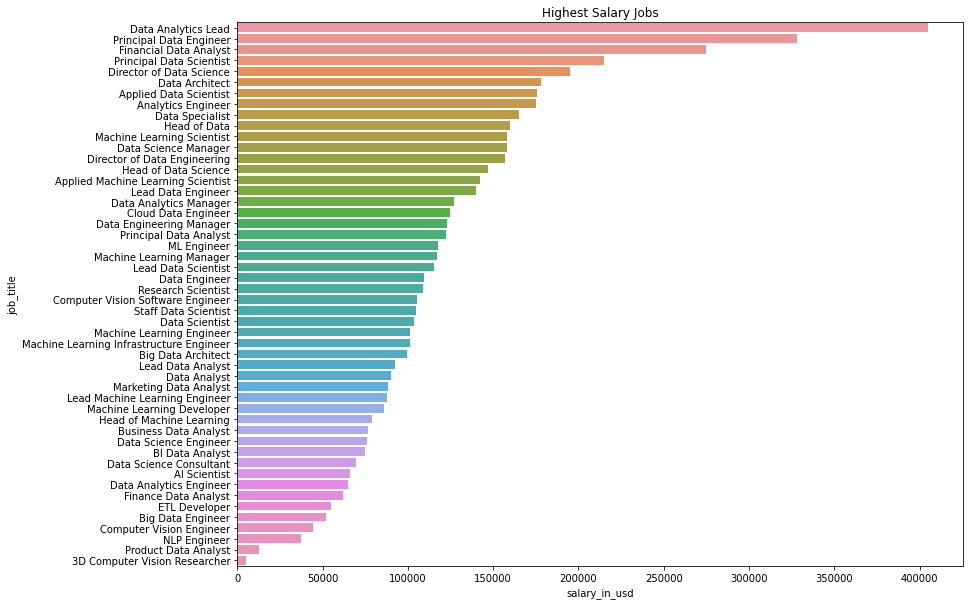

In [643]:
# Set the figure size
plt.figure(figsize = (13,10))

# plot a hist chart
sns.barplot(x = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False), 
            y = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending = False).index)
plt.xlabel = ("Salary in USD")
# plt.xticks(rotation='vertical')
plt.title("Highest Salary Jobs")

In [644]:
dftopsalary = ['salary_in_usd', 'job_title']
df[dftopsalary].max()

salary_in_usd                  600000
job_title        Staff Data Scientist
dtype: object

In [645]:
df[dftopsalary].min()

salary_in_usd                             2859
job_title        3D Computer Vision Researcher
dtype: object

Observations :
- The chart shows that the highest salary by **Data Analytics Lead** is > 400,000 USD and the lowest by **3D Computer Vision Researcher** is < 3,000 USD.
- The average salary of workers in the Data Science field is 100,000 USD.

#### **Analysis 2: What are the top 10 data science jobs in 2022?**

In [646]:
df.groupby(['work_year']).agg(
    job_title = ('job_title','count')
).reset_index()

,work_year,job_title
0,2020,72
1,2021,215
2,2022,278


In [647]:
df.salary.value_counts()

80000      18
100000     16
120000     15
60000      14
150000     14
           ..
39600       1
1335000     1
52500       1
31000       1
129000      1
Name: salary, Length: 272, dtype: int64

In [648]:
df22 = df[df["work_year"] == 2022]
df22.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
287,2022,Senior-level,Full-time,Data Engineer,135000,USD,135000,US,Remote,US,Medium
288,2022,Senior-level,Full-time,Data Analyst,155000,USD,155000,US,Remote,US,Medium
289,2022,Senior-level,Full-time,Data Analyst,120600,USD,120600,US,Remote,US,Medium
290,2022,Mid-level,Full-time,Data Scientist,130000,USD,130000,US,Onsite,US,Medium
291,2022,Mid-level,Full-time,Data Scientist,90000,USD,90000,US,Onsite,US,Medium


In [649]:
df22.job_title.value_counts().head(10)

Data Engineer                79
Data Scientist               65
Data Analyst                 58
Machine Learning Engineer    16
Data Architect                8
Data Science Manager          5
Analytics Engineer            4
Research Scientist            4
Data Analytics Manager        4
Applied Data Scientist        3
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2022')

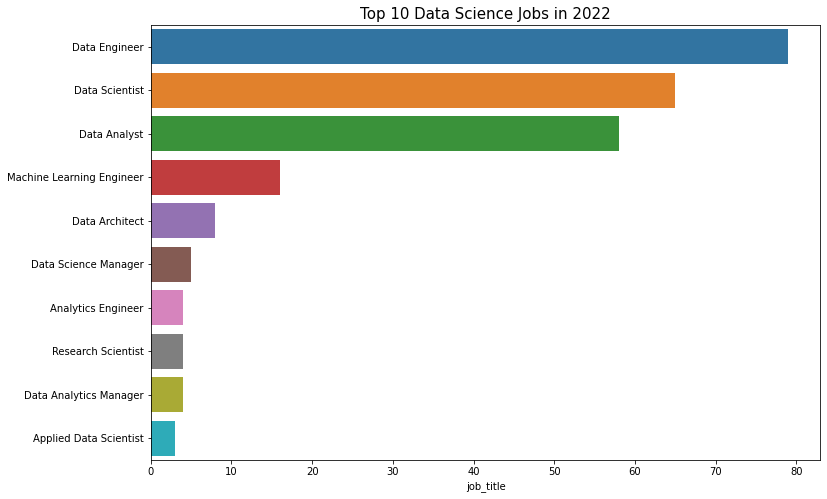

In [650]:
# Set the figure size
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = df22["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = df22["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2022', fontsize = 15)

Observations:

- In 2022, the top 10 popular data science jobs are shown on the chart and the most popular is **Data Engineer**.
- **Data Scientist**, **Data Engineer**, **Data Analyst** are the top 3 most popular jobs based on the data.

#### **Analysis 3: How does the remote-ratio vary from year 2020 -2022?**

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2022')

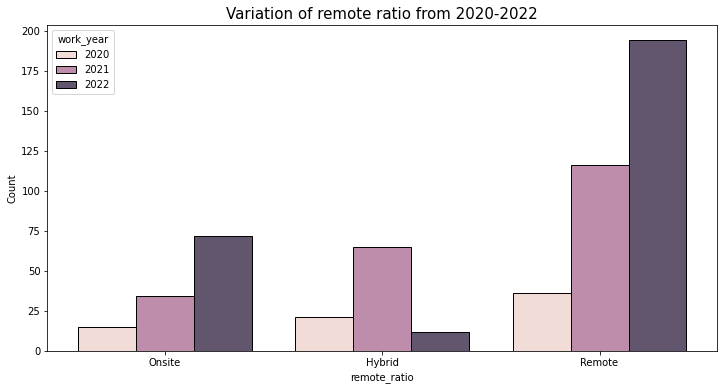

In [651]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a hist chart
sns.histplot(data = df, x = 'remote_ratio', hue = 'work_year', multiple = 'dodge', shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2022', fontsize = 15)

Observations:

- From 2020 to 2022 there will be an increase in the rate of remote work by Data Science workers.
- The chart shows the existence of a new culture that is most favored by Data Science workers, namely remote / work from home.

#### **Analysis 4: Does salary of employees (salary_in_usd) depends on the exprience level?**

Text(0.5, 1.0, 'Salary variation with exprience level')

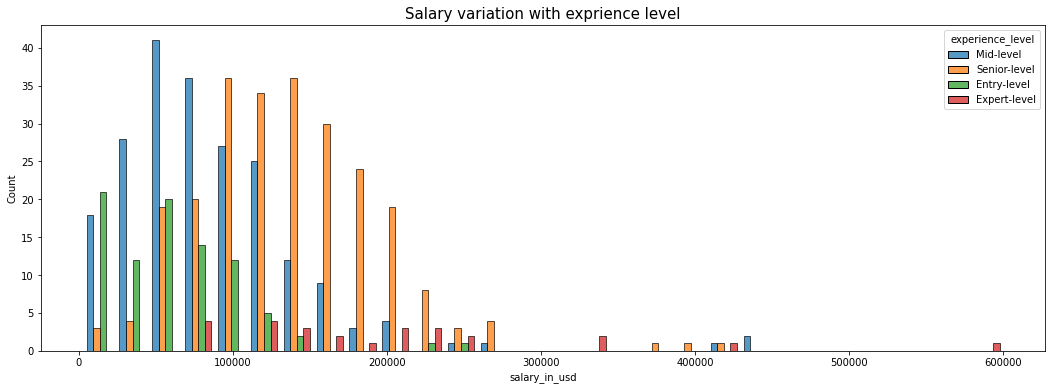

In [652]:
# Set the figure size
plt.figure(figsize = (18,6))

# plot a hist chart
sns.histplot(data = df, x = df.salary_in_usd, hue = 'experience_level', multiple = 'dodge', shrink = 0.8)
plt.title('Salary variation with exprience level', fontsize = 15)

Observations :

- Experience level highly effects the amount of salary.

#### **Analysis 5: How is the distribution of Data Science worker locations?**

Text(0.5, 1.0, 'Company Locations with Most Workers')

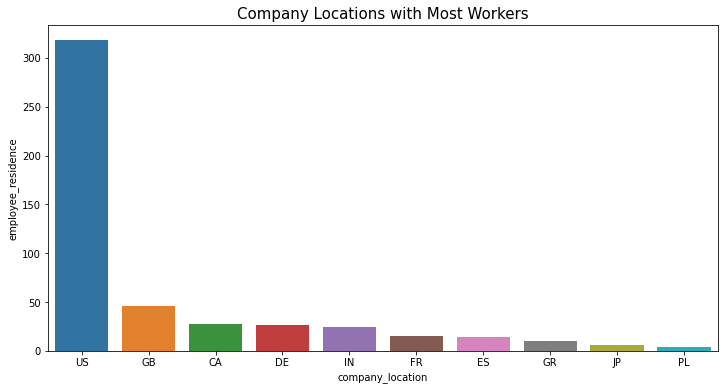

In [653]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a bar chart
sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, 
            y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)

Observation:

- Workers mostly are from american (US) companies.

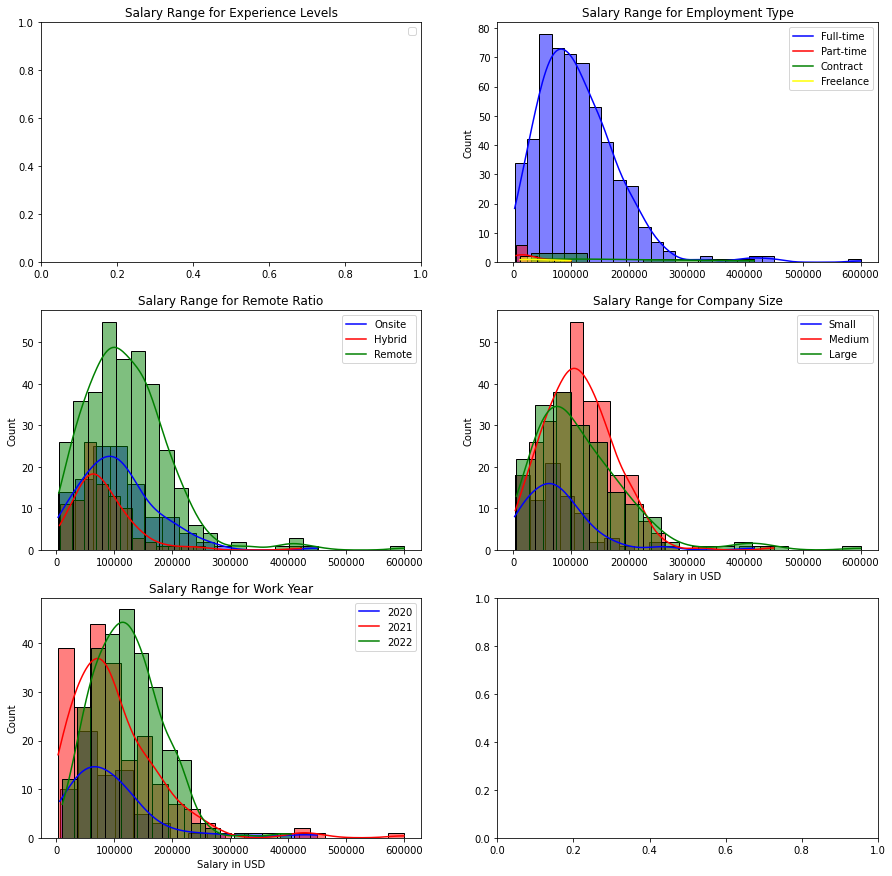

In [654]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

sns.histplot(df.query("experience_level == 'Entry'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Junior'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Senior'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Expert'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][0])
axes[0][0].legend(labels = ["Entry", "Junior", "Senior", "Expert"])
axes[0][0].set_xlabel("")
axes[0][0].set_title("Salary Range for Experience Levels")

sns.histplot(df.query("employment_type == 'Full-time'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Part-time'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Contract'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Freelance'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][1])
axes[0][1].legend(labels = ["Full-time", "Part-time", "Contract", "Freelance"])
axes[0][1].set_xlabel("")
axes[0][1].set_title("Salary Range for Employment Type")

sns.histplot(df.query("remote_ratio == 'Onsite'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Hybrid'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Remote'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][0])
axes[1][0].legend(labels = ["Onsite", "Hybrid", "Remote"])
axes[1][0].set_xlabel("")
axes[1][0].set_title("Salary Range for Remote Ratio")

sns.histplot(df.query("company_size == 'Small'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Medium'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Large'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][1])
axes[1][1].legend(labels = ["Small", "Medium", "Large"])
axes[1][1].set_xlabel("Salary in USD")
axes[1][1].set_title("Salary Range for Company Size")

sns.histplot(df.query("work_year == 2020")["salary_in_usd"], kde = True, color = "blue", ax = axes[2][0])
sns.histplot(df.query("work_year == 2021")["salary_in_usd"], kde = True, color = "red", ax = axes[2][0])
sns.histplot(df.query("work_year == 2022")["salary_in_usd"], kde = True, color = "green", ax = axes[2][0])
axes[2][0].legend(labels = ["2020", "2021", "2022"])
axes[2][0].set_xlabel("Salary in USD")
axes[2][0].set_title("Salary Range for Work Year");

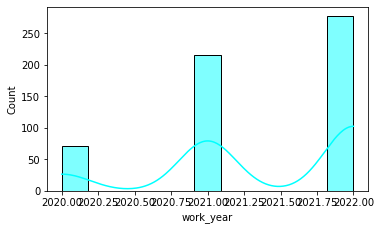

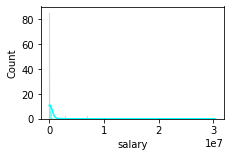

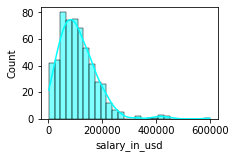

In [655]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='cyan', kde=True)
    # plt.xlabel(features[i])
    plt.tight_layout()
    plt.show()

In [656]:
# # adjust the figure size for better readability
# plt.figure(figsize=(12,6))

# features = numerical
# for i in range(0, len(features)):
#     plt.subplot(2, len(features)//2 + 1, i+1)
#     #plt.subplot(1, len(features), i+1)
#     sns.distplot(x=df[features[i]], color='skyblue')
#     plt.xlabel(features[i])
#     plt.tight_layout()

## **Data Preprocessing**

### Features Selection

We will predict salaries only for the top 10 data science jobs: **Data Engineer, Data Scientist, Data Analyst**.

In [657]:
df2 = df[df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst'])]

In [658]:
df2['job_title'].value_counts()

Data Scientist    130
Data Engineer     121
Data Analyst       82
Name: job_title, dtype: int64

Remove Redundant columns.

In [659]:
df2 = df2.drop(['work_year', 'salary_currency', 'salary'],axis=1)

### Add New Columns

In [660]:
# is the working country same as residence country?
df2['same_working_country'] = df2.apply(lambda x:  'Local Worker' 
                                      if x['employee_residence'] == x['company_location'] 
                                      else 'Expatriate', axis=1)

df2 = df2.drop(['employee_residence','company_location'],axis=1)

print("STATUS: Added column same_working_country")

STATUS: Added column same_working_country


In [661]:
df2['same_working_country'].value_counts()

Local Worker    314
Expatriate       19
Name: same_working_country, dtype: int64

In [662]:
# Reset Index
df2 = df2.reset_index(drop=True)

In [663]:
df2

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,same_working_country
0,Mid-level,Full-time,Data Scientist,79833,Onsite,Large,Local Worker
1,Entry-level,Full-time,Data Analyst,72000,Remote,Large,Local Worker
2,Mid-level,Full-time,Data Scientist,35735,Hybrid,Large,Local Worker
3,Entry-level,Full-time,Data Scientist,51321,Onsite,Small,Local Worker
4,Mid-level,Full-time,Data Scientist,40481,Onsite,Large,Local Worker
...,...,...,...,...,...,...,...
328,Entry-level,Full-time,Data Analyst,52000,Onsite,Medium,Local Worker
329,Senior-level,Full-time,Data Engineer,154000,Remote,Medium,Local Worker
330,Senior-level,Full-time,Data Engineer,126000,Remote,Medium,Local Worker
331,Senior-level,Full-time,Data Analyst,129000,Onsite,Medium,Local Worker


### One Hot Encoding

In [664]:
newdf = df2.copy()
newdf = pd.get_dummies(data=newdf, columns=['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'same_working_country'])
newdf

,salary_in_usd,experience_level_Entry-level,experience_level_Expert-level,experience_level_Mid-level,experience_level_Senior-level,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,remote_ratio_Hybrid,remote_ratio_Onsite,remote_ratio_Remote,company_size_Large,company_size_Medium,company_size_Small,same_working_country_Expatriate,same_working_country_Local Worker
0,79833,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1,72000,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2,35735,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
3,51321,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4,40481,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,52000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
329,154000,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1
330,126000,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1
331,129000,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


## **Split the data**

In [665]:
# split train test
from sklearn.model_selection import train_test_split

feature = newdf.drop(columns='salary_in_usd')
target = newdf[['salary_in_usd']]

#80:20
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

## **Multicollinearity Study**

In [666]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,experience_level_Entry-level,inf
2,experience_level_Expert-level,inf
3,experience_level_Mid-level,inf
4,experience_level_Senior-level,inf
5,employment_type_Freelance,inf
6,employment_type_Full-time,inf
7,employment_type_Part-time,inf
8,job_title_Data Analyst,inf
9,job_title_Data Engineer,inf
10,job_title_Data Scientist,inf


Column with multicollinearity :
*  `employment_type_Full-time`
*  `employment_type_Part-time`

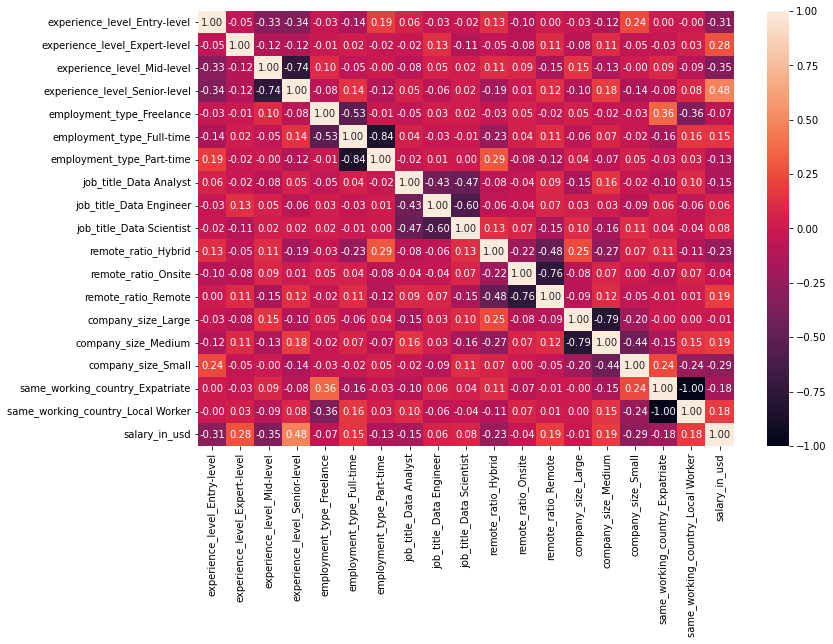

In [667]:
# heatmap correlation
train = pd.concat([feature_train, target_train], axis=1)
corr = train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Because columns `employment_type_Full-time` and `employment_type_Part-time` come from the same column, we need to drop.

In [668]:
# feature_train = feature_train.drop(columns=['employment_type_Full-time', 'employment_type_Part-time']) 
# feature_test = feature_test.drop(columns=['employment_type_Full-time', 'employment_type_Part-time'])
# target_train = target_train.drop(columns=['employment_type_Full-time', 'employment_type_Part-time']) 
# target_test = target_test.drop(columns=['employment_type_Full-time', 'employment_type_Part-time'])

In [669]:
# Recheck VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,experience_level_Entry-level,inf
2,experience_level_Expert-level,inf
3,experience_level_Mid-level,inf
4,experience_level_Senior-level,inf
5,employment_type_Freelance,inf
6,employment_type_Full-time,inf
7,employment_type_Part-time,inf
8,job_title_Data Analyst,inf
9,job_title_Data Engineer,inf
10,job_title_Data Scientist,inf


## **Modeling**

### Linear Regression Model

In [670]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# convert to numpy
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()

# train the model
multi_reg.fit(X_train, y_train)

LinearRegression()

In [671]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,1.249898e+18
1,experience_level_Entry-level,-8.913208e+17
2,experience_level_Expert-level,-8.913208e+17
3,experience_level_Mid-level,-8.913208e+17
4,experience_level_Senior-level,-8.913208e+17
5,employment_type_Freelance,1.701962e+17
6,employment_type_Full-time,1.701962e+17
7,employment_type_Part-time,1.701962e+17
8,job_title_Data Analyst,7.354423e+17
9,job_title_Data Engineer,7.354423e+17


### Model Diagnostic

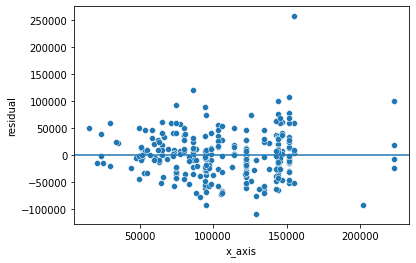

In [672]:
# calculate residuals
y_predict_train = multi_reg.predict(X_train)
residual = y_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


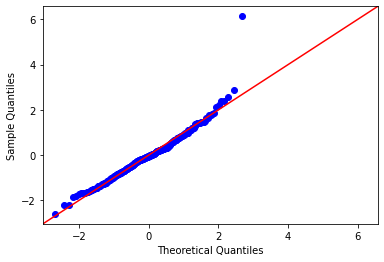

In [673]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

### Model Evaluation

#### Training Error

In [674]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))

R-squared for training data is -0.2276682386607738
RMSE for training data is 41911.72198298404


#### Testing Error

In [675]:
# prepare prediction result on test data
X_test = feature_test.to_numpy()
y_predict_test = multi_reg.predict(X_test)

# ground truth target
y_test = target_test.to_numpy()

In [676]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))

RMSE for testing data is 48214.51938727865
